In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

In [3]:
data = pd.read_excel('compiled_risk_data.xlsx')
data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [5]:
data.columns

Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

In [41]:
data_new = data.copy()
feature_1 = 'exploitation'
feature_2 = 'bad_contract'
feature_3 = 'external_dependencies'
feature_4 = 'centralized_risk_medium'
feature_5 = 'is_airdrop_scam'
selected_features = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5]].replace({True:1, False:0})
selected_features.head()

,exploitation,bad_contract,external_dependencies,centralized_risk_medium,is_airdrop_scam
0,1,1,1,1,0
1,0,1,1,0,0
2,1,0,1,0,0
3,1,0,0,1,1
4,1,0,1,0,0


In [43]:
distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)

In [45]:
linkage_matrix = sch.linkage(distance_matrix, method='ward')
linkage_matrix

array([[0.00000000e+00, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 9.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.17900000e+03, 2.18000000e+03, 7.90947458e+00, 4.72000000e+02],
       [2.18100000e+03, 2.18200000e+03, 9.07105523e+00, 6.97000000e+02],
       [2.15400000e+03, 2.18300000e+03, 1.95329783e+01, 1.09300000e+03]])

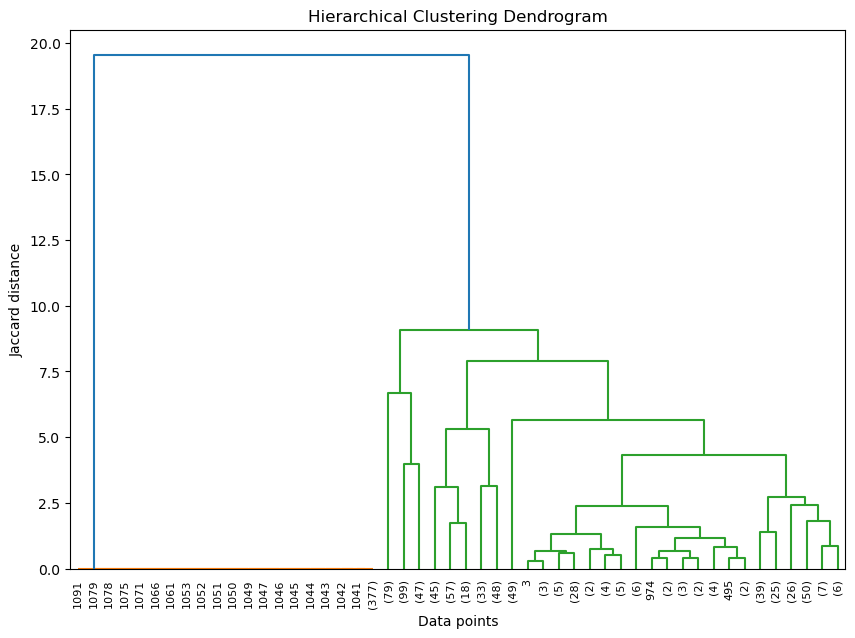

In [65]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix,
                           truncate_mode='lastp',
                           p=50)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

In [67]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')
data_new['cluster'] = cluster_labels
cluster_summary = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5,'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary

exploitation                        bad_contract                   \
                mean       std median count         mean       std median   
cluster                                                                     
1           0.000000  0.000000    0.0   396     0.000000  0.000000    0.0   
2           1.000000  0.000000    1.0    79     0.000000  0.000000    0.0   
3           0.678082  0.468820    1.0   146     1.000000  0.000000    1.0   
4           0.850000  0.358569    1.0   120     0.625000  0.486153    1.0   
5           0.000000  0.000000    0.0    81     0.000000  0.000000    0.0   
6           0.000000  0.000000    0.0    49     0.000000  0.000000    0.0   
7           0.846847  0.360949    1.0   222     0.684685  0.465691    1.0   

              external_dependencies                         \
        count                  mean       std median count   
cluster                                                      
1         396              0.000000  0.000000    0.0   396   
2          79              0.000000  0.000000    0.0    79   
3         146              0.000000  0.000000    0.0   146   
4         120              1.000000  0.000000    1.0   120   
5          81              1.000000  0.000000    1.0    81   
6          49              0.000000  0.000000    0.0    49   
7         222              0.518018  0.500804    1.0   222   

        centralized_risk_medium                        is_airdrop_scam  \
                           mean       std median count            mean   
cluster                                                                  
1                      0.000000  0.000000    0.0   396        0.000000   
2                      0.000000  0.000000    0.0    79        0.000000   
3                      0.000000  0.000000    0.0   146        0.000000   
4                      0.000000  0.000000    0.0   120        0.000000   
5                      0.407407  0.494413    0.0    81        0.000000   
6                      1.000000  0.000000    1.0    49        0.000000   
7                      0.905405  0.293316    1.0   222        0.310811   

                                
              std median count  
cluster                         
1        0.000000    0.0   396  
2        0.000000    0.0    79  
3        0.000000    0.0   146  
4        0.000000    0.0   120  
5        0.000000    0.0    81  
6        0.000000    0.0    49  
7        0.463871    0.0   222

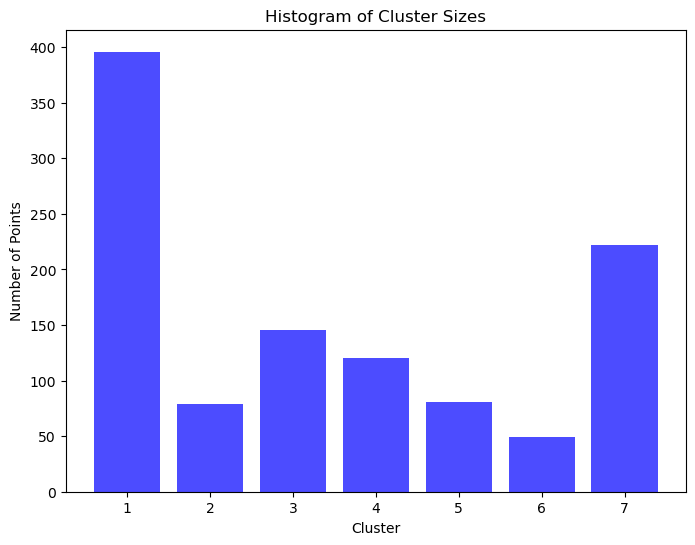

In [69]:
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

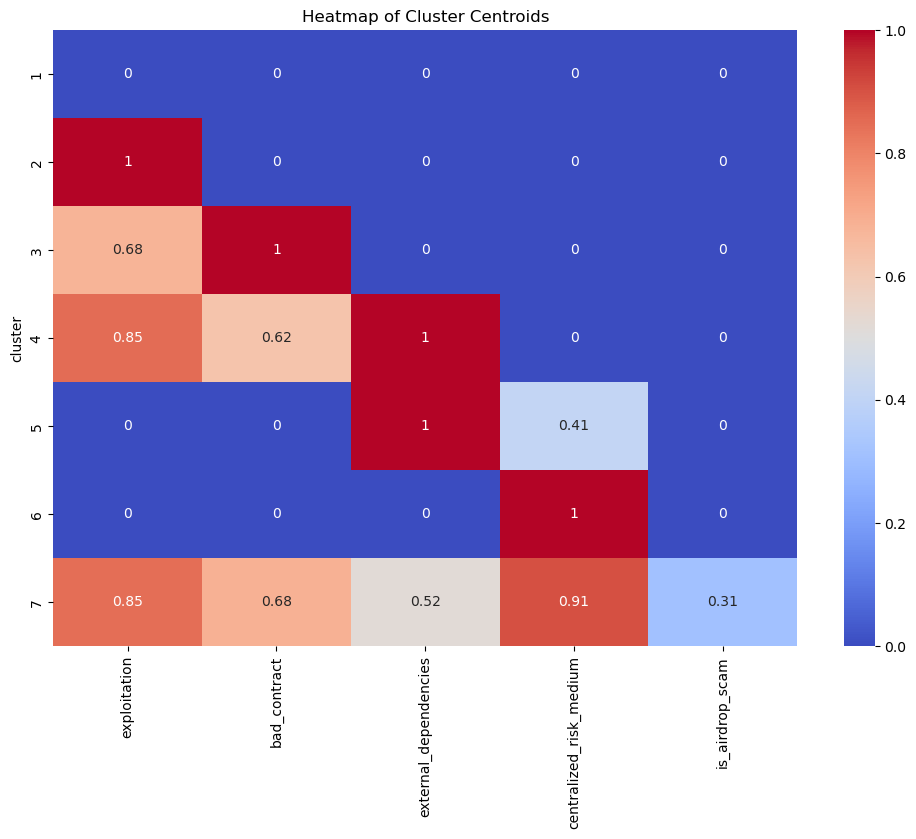

In [71]:
cluster_centers = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()